In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [4]:
# read in data and convert to 2D numpy array
url = 'https://raw.githubusercontent.com/shenge86/pythonhelpers/master/longley.csv'
df = pd.read_csv(url,header=None)
df

,0,1,2,3,4,5,6
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221
5,98.1,346.999,193.2,359.4,113.270,1952,63.639
6,99.0,365.385,187.0,354.7,115.094,1953,64.989
7,100.0,363.112,357.8,335.0,116.219,1954,63.761
8,101.2,397.469,290.4,304.8,117.388,1955,66.019
9,104.6,419.180,282.2,285.7,118.734,1956,67.857


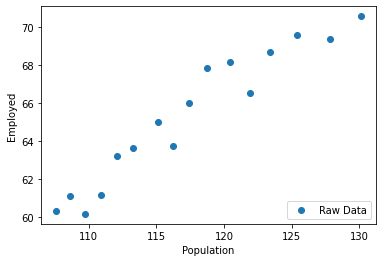

In [12]:
data = df.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# plot input vs output
plt.scatter(x, y, label='Raw Data')
plt.xlabel('Population')
plt.ylabel('Employed')
plt.legend(loc='lower right')

Als nächstes Können wir bestimmen, was für eine Funktion passend für diese Art von Daten wäre. Bei der in Abblungund x (oben) sichtbaren datenwolke liegt ein Linearer zusammenhang nahe, weswegen wir die FUnktion die wir auf dieser Datengrundlage Augbauen wollen auch als eine solche Definieren.

In [9]:
# create objective function
def objective_linear(x,a,b):
    return a*x+b

Als nächstes kann nun 

In [10]:
# do linear fit
fit_paramsL, covariances = curve_fit(objective_linear, x, y)
a, b = fit_paramsL
print('Parameter values: ')
print('y = %.5f * x + %.5f' % (a, b))

Parameter values: 
y = 0.48488 * x + 8.38067


In [15]:
x_monotonic = np.arange(min(x),max(x),1)
y_fit = objective_linear(x_monotonic,*fit_paramsL)

array([60.55743656, 61.04231465, 61.52719275, 62.01207084, 62.49694893,
       62.98182703, 63.46670512, 63.95158321, 64.4364613 , 64.9213394 ,
       65.40621749, 65.89109558, 66.37597368, 66.86085177, 67.34572986,
       67.83060795, 68.31548605, 68.80036414, 69.28524223, 69.77012032,
       70.25499842, 70.73987651, 71.2247546 ])

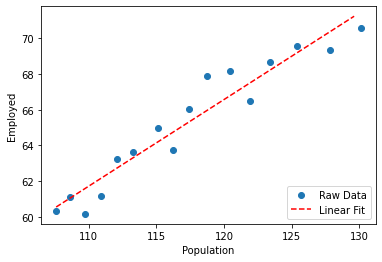

In [17]:
plt.scatter(x, y, label='Raw Data')
plt.xlabel('Population')
plt.ylabel('Employed')
plt.legend(loc='lower right')
plt.plot(x_monotonic,y_fit,'--',color='red',label='Linear Fit')
plt.legend(loc='lower right')
plt.savefig('populationvsemployed_linearfit.png')